# Pandemic Simulation

Source code referenced: https://towardsdatascience.com/simulating-the-pandemic-in-python-2aa8f7383b55

In [21]:
from scipy.stats import norm
import random 
import time
import os
import pandas as pd
from matplotlib import pyplot as plt

Scipy - allow us to calculate values within the Gaussian Distribution<br>
Random - will be for any random variables we want to create<br>
time - running simulations and watching the spread of disease
os - 

In [81]:
font = {'family': 'serif',
'color': 'darkred',
'weight': 'normal',
'size': 15,
}
font_Title = {'family': 'serif',
'color': 'darkred',
'size': 25,
}
size=15

In [2]:
peopleDictionary= []

### Create the Person() class

In [3]:
# simulation of a single person
class Person():
    def __init__(self, startingImmunity):
        if random.randint(0,100)<startingImmunity:
            self.immunity=True
        else:
            self.immunity=False
        self.contagiousness = 0
        self.mask = False
        self.contagiousDays = 0
        # use gaussian distribution for number of friends; average is 5 friends
        self.friends = int((norm.rvs(size=1,loc=0.5,scale=0.15)[0]*10).round(0))
    def wearMask(self):
        self.contagiousness /=2

In [4]:
Person(50).contagiousDays

0

Four user inputs in the initiateSim() function i.e. population, natural immunity of the population, contagious number of people at day 0 and how many days a person will stay contagous for.

This daysContagous variable should be random (or better, dependent on any number of personal health conditions, such as immune compromisation) but kept simple here for basic simulation.

In [5]:
def initiateSim():
    numPeople = int(input("Population: "))
    startingImmunity = int(input("Percentage of people with natural immunity: "))
    startingInfecters = int(input("How many people will be infectious at t=0: "))
    for x in range(0,numPeople):
        peopleDictionary.append(Person(startingImmunity))
    for x in range(0,startingInfecters):
        peopleDictionary[random.randint(0,len(peopleDictionary)-1)].contagiousness =\
        int((norm.rvs(size=1,loc=0.5,scale=0.15)[0]*10).round(0)*10)
    daysContagious = int(input("How many days contagious: "))
    lockdownDay = int(input("Day for lockdown to be used: "))
    maskDay = int(input("Day for masks to be used: "))
    return daysContagious, lockdownDay, maskDay

The runDay function takes daysContagious has multiple loops, contained in the Loops: <br>
1. uses list comprehension to find the people who are capable of spreading the disease - i.e. are contagious and have friends to visit.<br><br>
Then calculating the number of people they could meet on that day. The maximum is 50% of their friends and then we're using a standard random (or better, dependent on any number of personal health conditions, such as immune compromisation) but kept simple here for basic simulation.<br>
found from testing best to run simulation with a 408 day contagious period.<br><br>
2) We Span the number of people into the simulation. To start the disease, we pick people at random to be our "startingInfecters". As you see, we assign a Gaussian variable to each one for their level of contagiousness!

We return the number of days someone will stay contagious for, like mentioned.

Simulation will be done day by day, let's set up the function:

In [14]:
# this section simulates the spread, so it only operates on contagious people, thus:
def runDay(daysContagious, lockdown):
    for person in [person for person in peopleDictionary if person.contagiousness>0 and person.friends>0]:
        peopleCouldMeetToday = int(person.friends/2)
        if peopleCouldMeetToday > 0:
            peopleMetToday = random.randint(0,peopleCouldMeetToday)
        else:
            peopleMetToday = 0
        if lockdown == True:
            peopleMetToday = 0
            
        # simulation of the person meeting another person
        for x in range(0,peopleMetToday):
            friendInQuestion = peopleDictionary[random.randint(0,len(peopleDictionary)-1)] 
            if random.randint(0,100) < person.contagiousness and friendInQuestion.contagiousness ==0 and friendInQuestion.immunity == False:
                friendInQuestion.contagiousness = int((norm.rvs(size=1,loc=0.5,scale=0.15)[0]*10).round(0)*10)
                print(peopleDictionary.index(person), " >>> ", peopleDictionary.index(friendInQuestion))
                
    for person in [person for person in peopleDictionary if person.contagiousness>0]:
        person.contagiousDays += 1
        if person.contagiousDays > daysContagious:
            person.immunity = True
            person.contagiousness = 0
            print("|||", peopleDictionary.index(person),"|||")

Find all the people that are contagious and incrementing their contagiousDays variable by 1. If they've been contagous for more days than daysContagious time the user selected, they will become immune and hence their contagousness drops to 0.

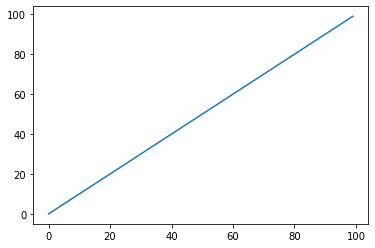

In [23]:
plt.plot(range(0,100),range(0,100))

Population: 5000
Percentage of people with natural immunity: 1
How many people will be infectious at t=0: 1
How many days contagious: 7
Day for lockdown to be enforced: 100
Day for masks to be used: 100
DAY 0
1  people are contagious on this day.
DAY 1
1  people are contagious on this day.
DAY 2
34764  >>>  28859
2  people are contagious on this day.
DAY 3
2  people are contagious on this day.
DAY 4
2  people are contagious on this day.
DAY 5
2  people are contagious on this day.
DAY 6
2  people are contagious on this day.
DAY 7
28859  >>>  27881
||| 34764 |||
2  people are contagious on this day.
DAY 8
2  people are contagious on this day.
DAY 9
||| 28859 |||
1  people are contagious on this day.
DAY 10
1  people are contagious on this day.
DAY 11
1  people are contagious on this day.
DAY 12
1  people are contagious on this day.
DAY 13
27881  >>>  16111
2  people are contagious on this day.
DAY 14
||| 27881 |||
1  people are contagious on this day.
DAY 15
16111  >>>  5198
2  people ar

32958  >>>  34410
33010  >>>  5805
33167  >>>  33920
33978  >>>  24601
34430  >>>  30301
||| 17197 |||
||| 17800 |||
||| 18369 |||
||| 18618 |||
||| 21099 |||
||| 21196 |||
||| 22744 |||
||| 23661 |||
||| 25236 |||
||| 25965 |||
||| 25994 |||
||| 27301 |||
||| 27940 |||
||| 30775 |||
||| 32774 |||
||| 33453 |||
339  people are contagious on this day.
DAY 41
5344  >>>  19034
6100  >>>  23972
9037  >>>  33429
13185  >>>  26464
14818  >>>  32603
15546  >>>  21030
15766  >>>  17950
15932  >>>  17471
15995  >>>  16696
16343  >>>  19299
16378  >>>  28710
17242  >>>  15517
17879  >>>  34930
18245  >>>  29516
18278  >>>  23436
18520  >>>  19403
18520  >>>  22009
18544  >>>  24950
18842  >>>  23915
19388  >>>  5459
19399  >>>  30871
19452  >>>  27337
19733  >>>  30894
19973  >>>  32409
20301  >>>  25661
20323  >>>  20253
20425  >>>  31473
20956  >>>  25793
21187  >>>  17109
21522  >>>  20975
21522  >>>  20938
21522  >>>  31164
21550  >>>  21024
22101  >>>  16714
22230  >>>  34054
22421  >>>  17

||| 28028 |||
||| 28600 |||
||| 29492 |||
||| 29587 |||
||| 30004 |||
||| 30260 |||
||| 30863 |||
||| 31565 |||
||| 32231 |||
||| 32927 |||
||| 32934 |||
||| 34334 |||
||| 34676 |||
671  people are contagious on this day.
DAY 44
5857  >>>  21113
5865  >>>  16586
6161  >>>  19617
9415  >>>  30950
9526  >>>  32420
13112  >>>  27504
13185  >>>  28780
13847  >>>  15684
13862  >>>  28931
14076  >>>  22825
15020  >>>  30237
15053  >>>  33287
15102  >>>  20302
15102  >>>  23764
15107  >>>  23319
15218  >>>  19084
15218  >>>  19698
15351  >>>  23068
15351  >>>  29250
15546  >>>  15920
15725  >>>  20142
15725  >>>  34261
15741  >>>  20840
15995  >>>  29361
16034  >>>  32834
16113  >>>  26943
16203  >>>  15428
16343  >>>  19578
16343  >>>  20556
16362  >>>  26772
16378  >>>  25868
16641  >>>  21183
16791  >>>  20618
16964  >>>  26767
17027  >>>  30929
17078  >>>  27982
17109  >>>  13230
17109  >>>  28973
17109  >>>  15937
17375  >>>  15345
17471  >>>  21509
17532  >>>  28255
17754  >>>  32814
17

33794  >>>  15099
33805  >>>  9882
34152  >>>  32182
34171  >>>  33732
34312  >>>  23023
34410  >>>  25942
34580  >>>  32557
34813  >>>  14056
34931  >>>  20264
34989  >>>  18968
||| 5344 |||
||| 15020 |||
||| 15546 |||
||| 16034 |||
||| 17193 |||
||| 18584 |||
||| 18842 |||
||| 19399 |||
||| 19452 |||
||| 19645 |||
||| 19783 |||
||| 20271 |||
||| 20301 |||
||| 20686 |||
||| 21369 |||
||| 21522 |||
||| 21550 |||
||| 23283 |||
||| 23470 |||
||| 23698 |||
||| 23789 |||
||| 24474 |||
||| 24532 |||
||| 25196 |||
||| 25510 |||
||| 25939 |||
||| 26248 |||
||| 26613 |||
||| 26747 |||
||| 26909 |||
||| 27117 |||
||| 27434 |||
||| 27505 |||
||| 27984 |||
||| 28158 |||
||| 29257 |||
||| 29583 |||
||| 30546 |||
||| 30883 |||
||| 31292 |||
||| 32075 |||
||| 32102 |||
||| 32398 |||
||| 32850 |||
||| 32866 |||
||| 33010 |||
||| 33720 |||
||| 34520 |||
1058  people are contagious on this day.
DAY 46
5459  >>>  18595
5865  >>>  24802
5865  >>>  22016
6600  >>>  16309
7438  >>>  29043
8686  >>>  12272


15770  >>>  32703
15825  >>>  26143
15825  >>>  33054
15896  >>>  30828
15920  >>>  34212
15920  >>>  24024
15991  >>>  6109
16095  >>>  22092
16095  >>>  33577
16148  >>>  27002
16155  >>>  22462
16198  >>>  27666
16203  >>>  27665
16266  >>>  21028
16309  >>>  19405
16356  >>>  22525
16442  >>>  28856
16491  >>>  20423
16540  >>>  26643
16555  >>>  16966
16591  >>>  25065
16591  >>>  33281
16641  >>>  23579
16765  >>>  21893
16844  >>>  16600
16950  >>>  24592
16964  >>>  20470
17027  >>>  15447
17053  >>>  31196
17079  >>>  21803
17084  >>>  32117
17141  >>>  21591
17144  >>>  26600
17217  >>>  16420
17289  >>>  22597
17309  >>>  15834
17348  >>>  32152
17404  >>>  21966
17470  >>>  22758
17471  >>>  21889
17498  >>>  25251
17532  >>>  8096
17532  >>>  32802
17612  >>>  20931
17740  >>>  29662
17753  >>>  32099
17757  >>>  23547
17757  >>>  34891
17868  >>>  32538
17886  >>>  22852
17909  >>>  33252
17950  >>>  17789
17984  >>>  32532
17998  >>>  12416
18003  >>>  25772
18003  >>>  

16616  >>>  28032
16697  >>>  24919
16697  >>>  23645
16765  >>>  15129
16765  >>>  20555
16811  >>>  16071
16844  >>>  30801
16966  >>>  27359
16975  >>>  19916
16975  >>>  33115
16993  >>>  22471
17027  >>>  33388
17079  >>>  23924
17092  >>>  25000
17109  >>>  28066
17116  >>>  25119
17116  >>>  17870
17141  >>>  34657
17144  >>>  28143
17144  >>>  8176
17223  >>>  28878
17238  >>>  17543
17309  >>>  12965
17323  >>>  28930
17371  >>>  19533
17468  >>>  19028
17468  >>>  17525
17471  >>>  25821
17471  >>>  15594
17740  >>>  30221
17781  >>>  20461
17782  >>>  34506
17824  >>>  26398
17825  >>>  16116
17852  >>>  20804
17852  >>>  23041
17882  >>>  34984
17931  >>>  28483
17995  >>>  20706
18075  >>>  26745
18075  >>>  30955
18098  >>>  5520
18099  >>>  32127
18191  >>>  16298
18193  >>>  28073
18193  >>>  21262
18259  >>>  15526
18323  >>>  20235
18436  >>>  24893
18477  >>>  16566
18497  >>>  31579
18606  >>>  16982
18608  >>>  27866
18620  >>>  25997
18643  >>>  30017
18701  >>>  

18963  >>>  29656
18971  >>>  14380
18990  >>>  14373
18992  >>>  29497
19084  >>>  16900
19105  >>>  32212
19132  >>>  9194
19132  >>>  15664
19257  >>>  21154
19278  >>>  17661
19308  >>>  27659
19320  >>>  34748
19326  >>>  30148
19334  >>>  20920
19351  >>>  28586
19357  >>>  27558
19411  >>>  15495
19449  >>>  22854
19516  >>>  15307
19517  >>>  30427
19533  >>>  29247
19609  >>>  26233
19639  >>>  30558
19728  >>>  19651
19728  >>>  34620
19750  >>>  22075
19760  >>>  17944
19802  >>>  20279
19854  >>>  21669
19862  >>>  15660
19864  >>>  33172
19893  >>>  21368
19909  >>>  27029
19909  >>>  23382
19926  >>>  34490
19926  >>>  32672
19939  >>>  23942
19939  >>>  24935
20154  >>>  15733
20174  >>>  20176
20260  >>>  20427
20264  >>>  14460
20290  >>>  26723
20302  >>>  20924
20461  >>>  19712
20461  >>>  17878
20461  >>>  31748
20470  >>>  29811
20499  >>>  34953
20539  >>>  25341
20557  >>>  21959
20569  >>>  24448
20569  >>>  28853
20571  >>>  19558
20613  >>>  26077
20618  >>> 

||| 33095 |||
||| 33123 |||
||| 33379 |||
||| 33490 |||
||| 33581 |||
||| 33634 |||
||| 33714 |||
||| 33794 |||
||| 34130 |||
||| 34222 |||
||| 34347 |||
||| 34650 |||
||| 34853 |||
||| 34911 |||
||| 34931 |||
||| 34989 |||
2494  people are contagious on this day.
DAY 50
6109  >>>  32087
6120  >>>  31785
6730  >>>  21351
7155  >>>  31274
7962  >>>  24971
8096  >>>  31320
8302  >>>  12673
8686  >>>  16068
8710  >>>  20130
8996  >>>  23242
9194  >>>  22819
10329  >>>  34586
10348  >>>  19821
10460  >>>  15252
11702  >>>  23310
11764  >>>  19953
11770  >>>  22320
12352  >>>  28834
12659  >>>  19082
12747  >>>  26625
12965  >>>  34731
13027  >>>  30067
13329  >>>  15011
13583  >>>  28188
14167  >>>  34773
14380  >>>  29446
14458  >>>  17617
14506  >>>  25221
14571  >>>  28748
14847  >>>  24955
15012  >>>  29774
15026  >>>  26329
15032  >>>  24726
15056  >>>  26985
15056  >>>  26654
15099  >>>  34833
15102  >>>  29094
15149  >>>  18275
15230  >>>  34892
15307  >>>  29319
15345  >>>  30442
1

28767  >>>  31056
28769  >>>  22515
28780  >>>  31042
28780  >>>  19106
28842  >>>  21935
28894  >>>  25644
28894  >>>  33009
28894  >>>  26064
28930  >>>  19395
28958  >>>  30417
28969  >>>  25017
28969  >>>  33325
28970  >>>  12301
28982  >>>  27963
28994  >>>  31725
29042  >>>  18353
29047  >>>  34582
29047  >>>  17551
29049  >>>  34831
29055  >>>  15947
29085  >>>  30204
29114  >>>  25834
29134  >>>  33359
29134  >>>  22565
29152  >>>  27516
29162  >>>  33023
29206  >>>  11660
29283  >>>  9188
29295  >>>  29156
29301  >>>  27716
29331  >>>  16625
29497  >>>  29014
29500  >>>  27444
29656  >>>  15614
29674  >>>  19349
29674  >>>  34306
29699  >>>  13418
29703  >>>  19138
29764  >>>  26084
29800  >>>  19984
29800  >>>  15316
29898  >>>  29184
29907  >>>  25483
29915  >>>  15098
29974  >>>  24240
29982  >>>  18567
29990  >>>  29296
30045  >>>  33043
30064  >>>  23240
30135  >>>  31782
30142  >>>  20509
30142  >>>  22658
30222  >>>  21783
30235  >>>  17812
30235  >>>  22283
30307  >>> 

22124  >>>  34955
22134  >>>  20529
22134  >>>  19975
22173  >>>  16014
22209  >>>  20166
22237  >>>  16778
22276  >>>  20822
22276  >>>  25979
22346  >>>  20524
22347  >>>  23460
22412  >>>  16860
22426  >>>  31916
22471  >>>  32671
22510  >>>  22282
22515  >>>  29812
22525  >>>  33617
22561  >>>  22220
22583  >>>  32274
22604  >>>  23169
22604  >>>  22552
22622  >>>  23345
22642  >>>  24355
22642  >>>  28453
22701  >>>  15170
22725  >>>  34838
22729  >>>  18467
22732  >>>  18427
22772  >>>  32761
22795  >>>  30927
22819  >>>  24737
22825  >>>  29267
22844  >>>  26336
22852  >>>  18904
22858  >>>  31636
22858  >>>  33227
22979  >>>  19168
22988  >>>  16215
22988  >>>  34018
22991  >>>  33743
23010  >>>  22835
23043  >>>  18397
23092  >>>  23793
23228  >>>  22668
23230  >>>  16687
23300  >>>  32262
23310  >>>  21081
23325  >>>  16699
23340  >>>  24295
23382  >>>  19607
23395  >>>  27590
23503  >>>  22627
23584  >>>  31117
23588  >>>  32512
23709  >>>  25348
23764  >>>  28282
23812  >>>

34918  >>>  24588
34965  >>>  25226
34965  >>>  33192
34981  >>>  15164
34987  >>>  34226
34987  >>>  28398
||| 5236 |||
||| 5896 |||
||| 6567 |||
||| 8170 |||
||| 8685 |||
||| 8783 |||
||| 9533 |||
||| 10814 |||
||| 13230 |||
||| 13695 |||
||| 13911 |||
||| 15153 |||
||| 15345 |||
||| 15428 |||
||| 15471 |||
||| 15649 |||
||| 15684 |||
||| 15703 |||
||| 15772 |||
||| 15773 |||
||| 15920 |||
||| 15934 |||
||| 15937 |||
||| 16202 |||
||| 16320 |||
||| 16540 |||
||| 16586 |||
||| 16591 |||
||| 16611 |||
||| 16684 |||
||| 16753 |||
||| 16874 |||
||| 16876 |||
||| 16895 |||
||| 17348 |||
||| 17565 |||
||| 17573 |||
||| 17677 |||
||| 17707 |||
||| 17744 |||
||| 17750 |||
||| 17782 |||
||| 17995 |||
||| 18079 |||
||| 18216 |||
||| 18392 |||
||| 18638 |||
||| 18701 |||
||| 18706 |||
||| 18724 |||
||| 18874 |||
||| 19084 |||
||| 19320 |||
||| 19439 |||
||| 19442 |||
||| 19454 |||
||| 19458 |||
||| 19578 |||
||| 19617 |||
||| 19698 |||
||| 19719 |||
||| 19773 |||
||| 19862 |||
||| 19909 |||
|||

23994  >>>  21379
24020  >>>  23591
24020  >>>  16552
24024  >>>  28762
24045  >>>  24751
24062  >>>  18222
24070  >>>  25002
24081  >>>  23838
24092  >>>  30075
24132  >>>  26091
24142  >>>  32791
24200  >>>  29031
24203  >>>  32324
24236  >>>  18897
24249  >>>  21702
24260  >>>  23191
24293  >>>  16190
24347  >>>  32220
24349  >>>  20587
24433  >>>  29465
24480  >>>  25500
24518  >>>  15173
24591  >>>  28790
24621  >>>  31427
24657  >>>  17439
24711  >>>  17150
24718  >>>  20104
24757  >>>  30243
24759  >>>  31593
24784  >>>  31999
24799  >>>  20898
24802  >>>  19280
24802  >>>  24821
24822  >>>  25436
24830  >>>  29522
24831  >>>  25477
24881  >>>  20275
24887  >>>  14949
24901  >>>  24298
24916  >>>  17775
24919  >>>  28673
24933  >>>  24460
24933  >>>  17335
25098  >>>  18357
25114  >>>  28454
25119  >>>  31036
25119  >>>  32940
25125  >>>  25883
25140  >>>  26884
25141  >>>  29771
25141  >>>  16301
25152  >>>  32735
25242  >>>  24309
25317  >>>  34283
25334  >>>  30059
25347  >>>

||| 17852 |||
||| 17882 |||
||| 17886 |||
||| 18003 |||
||| 18075 |||
||| 18099 |||
||| 18294 |||
||| 18436 |||
||| 18526 |||
||| 18589 |||
||| 18608 |||
||| 18631 |||
||| 18779 |||
||| 18839 |||
||| 18846 |||
||| 18917 |||
||| 18968 |||
||| 19165 |||
||| 19215 |||
||| 19230 |||
||| 19238 |||
||| 19261 |||
||| 19308 |||
||| 19326 |||
||| 19366 |||
||| 19373 |||
||| 19375 |||
||| 19408 |||
||| 19508 |||
||| 19609 |||
||| 19793 |||
||| 19801 |||
||| 19939 |||
||| 19986 |||
||| 20007 |||
||| 20118 |||
||| 20129 |||
||| 20264 |||
||| 20290 |||
||| 20314 |||
||| 20343 |||
||| 20362 |||
||| 20374 |||
||| 20499 |||
||| 20544 |||
||| 20716 |||
||| 20932 |||
||| 21060 |||
||| 21360 |||
||| 21385 |||
||| 21792 |||
||| 21793 |||
||| 21882 |||
||| 21923 |||
||| 22098 |||
||| 22138 |||
||| 22276 |||
||| 22314 |||
||| 22347 |||
||| 22527 |||
||| 22636 |||
||| 22720 |||
||| 22750 |||
||| 22850 |||
||| 22865 |||
||| 22936 |||
||| 23001 |||
||| 23023 |||
||| 23211 |||
||| 23454 |||
||| 23532 |||
||| 23

19663  >>>  27270
19677  >>>  20776
19705  >>>  31437
19726  >>>  21936
19738  >>>  30288
19749  >>>  27862
19749  >>>  30767
19763  >>>  25990
19811  >>>  31127
19821  >>>  29461
19853  >>>  32125
19867  >>>  22186
19912  >>>  16426
19924  >>>  5530
20006  >>>  33746
20006  >>>  20795
20044  >>>  18601
20063  >>>  24188
20067  >>>  29394
20074  >>>  29420
20074  >>>  18166
20138  >>>  29926
20138  >>>  31350
20166  >>>  31585
20166  >>>  16929
20183  >>>  30906
20252  >>>  21064
20275  >>>  21614
20331  >>>  29610
20353  >>>  19715
20368  >>>  16213
20369  >>>  33268
20379  >>>  31247
20446  >>>  30517
20462  >>>  25144
20464  >>>  33527
20514  >>>  19629
20517  >>>  26902
20598  >>>  32989
20715  >>>  17466
20743  >>>  20173
20796  >>>  20668
20822  >>>  19415
20827  >>>  22169
20855  >>>  33567
20940  >>>  20897
20971  >>>  21195
20998  >>>  33036
21003  >>>  30527
21019  >>>  23938
21032  >>>  21158
21040  >>>  14308
21090  >>>  27655
21095  >>>  29316
21095  >>>  33494
21133  >>> 

34586  >>>  20645
34724  >>>  25184
34726  >>>  19720
34743  >>>  23276
34748  >>>  21584
34770  >>>  19746
34808  >>>  26641
34838  >>>  26099
34871  >>>  19154
34891  >>>  20960
34896  >>>  22523
34896  >>>  23620
34953  >>>  34325
34965  >>>  32303
34983  >>>  23369
||| 5093 |||
||| 5529 |||
||| 5765 |||
||| 5823 |||
||| 6192 |||
||| 6395 |||
||| 7155 |||
||| 8302 |||
||| 8688 |||
||| 8944 |||
||| 12272 |||
||| 12348 |||
||| 12417 |||
||| 12747 |||
||| 14571 |||
||| 14847 |||
||| 14902 |||
||| 15004 |||
||| 15046 |||
||| 15074 |||
||| 15114 |||
||| 15117 |||
||| 15120 |||
||| 15143 |||
||| 15169 |||
||| 15178 |||
||| 15296 |||
||| 15336 |||
||| 15377 |||
||| 15401 |||
||| 15474 |||
||| 15663 |||
||| 15666 |||
||| 15751 |||
||| 15911 |||
||| 15936 |||
||| 15978 |||
||| 15984 |||
||| 16018 |||
||| 16042 |||
||| 16054 |||
||| 16148 |||
||| 16178 |||
||| 16198 |||
||| 16270 |||
||| 16309 |||
||| 16313 |||
||| 16356 |||
||| 16408 |||
||| 16419 |||
||| 16442 |||
||| 16463 |||
||| 16478 ||

20096  >>>  19818
20119  >>>  22612
20123  >>>  34354
20158  >>>  27224
20158  >>>  24093
20183  >>>  26113
20220  >>>  31669
20220  >>>  28345
20243  >>>  34504
20252  >>>  17147
20252  >>>  20317
20287  >>>  22779
20307  >>>  22166
20363  >>>  27875
20435  >>>  21749
20446  >>>  20562
20508  >>>  30035
20509  >>>  32690
20509  >>>  19283
20512  >>>  18850
20534  >>>  21822
20568  >>>  22431
20586  >>>  7452
20633  >>>  29607
20637  >>>  19570
20641  >>>  18318
20645  >>>  33951
20730  >>>  14814
20735  >>>  20388
20742  >>>  24322
20776  >>>  27510
20820  >>>  23078
20822  >>>  25026
20824  >>>  20241
20847  >>>  20344
20891  >>>  28164
20974  >>>  25943
20977  >>>  25977
20988  >>>  31315
20989  >>>  26866
21019  >>>  26958
21052  >>>  15318
21097  >>>  21476
21192  >>>  25195
21202  >>>  26337
21206  >>>  16487
21232  >>>  22588
21246  >>>  20695
21251  >>>  24517
21368  >>>  34346
21370  >>>  24864
21399  >>>  13450
21473  >>>  25863
21482  >>>  23613
21532  >>>  25886
21573  >>> 

29852  >>>  22542
29854  >>>  19971
29860  >>>  33948
29898  >>>  17889
29907  >>>  32161
29934  >>>  8872
29939  >>>  25582
29946  >>>  25382
29980  >>>  27853
29994  >>>  29309
30007  >>>  26946
30044  >>>  29104
30045  >>>  17165
30063  >>>  27998
30090  >>>  30072
30092  >>>  22243
30118  >>>  24622
30132  >>>  23155
30148  >>>  31543
30204  >>>  17174
30217  >>>  31217
30218  >>>  27429
30221  >>>  18536
30236  >>>  29702
30263  >>>  33474
30282  >>>  15052
30288  >>>  21034
30339  >>>  15543
30361  >>>  19686
30482  >>>  26620
30486  >>>  30079
30487  >>>  27274
30510  >>>  16768
30533  >>>  17821
30549  >>>  23424
30549  >>>  22673
30580  >>>  24892
30583  >>>  21851
30589  >>>  30311
30602  >>>  20793
30617  >>>  25298
30630  >>>  19088
30701  >>>  33206
30701  >>>  19098
30701  >>>  17241
30707  >>>  29750
30716  >>>  23618
30719  >>>  31440
30727  >>>  10210
30727  >>>  28118
30739  >>>  34923
30797  >>>  31966
30827  >>>  31794
30838  >>>  33679
30874  >>>  23461
30902  >>> 

16549  >>>  17726
16568  >>>  25471
16613  >>>  31911
16648  >>>  26136
16662  >>>  32531
16687  >>>  25082
16688  >>>  17510
16700  >>>  29581
16708  >>>  17923
16715  >>>  26229
16736  >>>  31560
16736  >>>  32817
16751  >>>  17803
16751  >>>  20419
16767  >>>  18030
16778  >>>  34990
16799  >>>  32646
16799  >>>  25269
16810  >>>  20485
16854  >>>  30320
16863  >>>  15281
16873  >>>  18646
16898  >>>  15376
16914  >>>  18164
16915  >>>  24756
16936  >>>  23966
16969  >>>  15461
16991  >>>  23962
17011  >>>  33612
17029  >>>  28905
17038  >>>  18242
17043  >>>  26069
17043  >>>  19814
17056  >>>  23970
17103  >>>  33684
17111  >>>  32455
17122  >>>  18387
17175  >>>  29271
17241  >>>  17811
17254  >>>  16306
17254  >>>  15425
17263  >>>  18768
17295  >>>  24056
17335  >>>  20493
17341  >>>  19590
17395  >>>  25998
17399  >>>  17691
17431  >>>  27675
17439  >>>  31536
17441  >>>  25659
17537  >>>  33583
17538  >>>  15634
17543  >>>  11488
17584  >>>  16126
17609  >>>  8824
17661  >>> 

29772  >>>  32193
29774  >>>  25440
29775  >>>  27432
29787  >>>  21466
29790  >>>  26782
29797  >>>  24150
29800  >>>  25313
29800  >>>  19797
29806  >>>  21972
29822  >>>  25543
29831  >>>  18887
29854  >>>  28318
29860  >>>  17350
29907  >>>  17432
29945  >>>  28307
29945  >>>  32702
29982  >>>  15241
30010  >>>  19969
30020  >>>  14429
30035  >>>  11434
30044  >>>  34289
30064  >>>  28867
30075  >>>  17563
30090  >>>  17947
30102  >>>  28595
30107  >>>  30270
30107  >>>  30990
30112  >>>  19413
30128  >>>  17885
30129  >>>  33169
30145  >>>  17736
30147  >>>  16011
30204  >>>  22670
30208  >>>  26733
30212  >>>  31270
30221  >>>  21817
30230  >>>  33518
30245  >>>  21174
30263  >>>  20502
30294  >>>  33837
30311  >>>  19989
30324  >>>  31926
30354  >>>  34737
30370  >>>  16390
30406  >>>  17310
30432  >>>  27278
30464  >>>  31839
30487  >>>  23874
30510  >>>  26404
30536  >>>  27228
30547  >>>  27732
30561  >>>  34887
30582  >>>  20153
30584  >>>  18021
30630  >>>  5031
30637  >>> 

15063  >>>  15812
15071  >>>  29928
15073  >>>  27152
15080  >>>  10483
15138  >>>  24962
15144  >>>  29709
15147  >>>  5637
15148  >>>  18564
15151  >>>  24140
15164  >>>  22302
15170  >>>  31077
15173  >>>  21947
15195  >>>  34549
15210  >>>  16835
15232  >>>  21193
15252  >>>  31734
15283  >>>  33142
15323  >>>  12002
15333  >>>  33244
15333  >>>  27820
15335  >>>  28785
15343  >>>  29262
15344  >>>  22129
15383  >>>  32149
15421  >>>  18460
15430  >>>  23307
15433  >>>  28648
15462  >>>  21539
15465  >>>  29398
15524  >>>  32604
15533  >>>  32847
15545  >>>  17763
15616  >>>  10589
15635  >>>  19047
15754  >>>  18371
15756  >>>  16315
15765  >>>  33650
15782  >>>  26489
15791  >>>  32525
15838  >>>  25801
15841  >>>  29391
15845  >>>  29924
15851  >>>  24833
15858  >>>  24162
15865  >>>  18119
15885  >>>  24199
15887  >>>  28720
15894  >>>  21773
15910  >>>  22081
15924  >>>  15863
15979  >>>  29602
15979  >>>  16542
15983  >>>  16987
16017  >>>  22231
16024  >>>  17628
16028  >>> 

26520  >>>  22606
26550  >>>  23815
26618  >>>  23947
26630  >>>  22891
26645  >>>  20149
26649  >>>  27888
26670  >>>  19006
26700  >>>  33939
26700  >>>  15539
26706  >>>  20745
26719  >>>  31302
26734  >>>  21602
26734  >>>  15668
26738  >>>  28388
26742  >>>  33735
26788  >>>  27232
26813  >>>  22096
26813  >>>  34949
26823  >>>  6644
26835  >>>  18115
26947  >>>  28583
26954  >>>  15444
26975  >>>  16230
26993  >>>  22002
27001  >>>  34498
27004  >>>  23730
27050  >>>  17723
27051  >>>  32922
27101  >>>  15602
27112  >>>  17353
27153  >>>  21856
27181  >>>  16923
27192  >>>  31979
27227  >>>  19345
27233  >>>  19547
27238  >>>  21417
27270  >>>  27676
27274  >>>  29503
27277  >>>  32278
27305  >>>  13124
27318  >>>  23159
27334  >>>  15286
27355  >>>  20145
27357  >>>  21572
27378  >>>  22833
27397  >>>  9618
27407  >>>  33655
27407  >>>  16303
27408  >>>  17253
27444  >>>  20080
27474  >>>  33322
27482  >>>  23816
27509  >>>  31902
27541  >>>  15767
27547  >>>  33896
27555  >>>  

||| 22854 |||
||| 23094 |||
||| 23101 |||
||| 23221 |||
||| 23230 |||
||| 23328 |||
||| 23330 |||
||| 23349 |||
||| 23379 |||
||| 23382 |||
||| 23518 |||
||| 23583 |||
||| 23599 |||
||| 23651 |||
||| 23709 |||
||| 23721 |||
||| 23744 |||
||| 23770 |||
||| 23780 |||
||| 23828 |||
||| 23851 |||
||| 23880 |||
||| 23897 |||
||| 23909 |||
||| 23917 |||
||| 23921 |||
||| 23942 |||
||| 23948 |||
||| 23980 |||
||| 23982 |||
||| 24020 |||
||| 24057 |||
||| 24062 |||
||| 24128 |||
||| 24171 |||
||| 24196 |||
||| 24242 |||
||| 24252 |||
||| 24259 |||
||| 24269 |||
||| 24371 |||
||| 24392 |||
||| 24414 |||
||| 24448 |||
||| 24484 |||
||| 24591 |||
||| 24661 |||
||| 24691 |||
||| 24696 |||
||| 24742 |||
||| 24767 |||
||| 24901 |||
||| 24926 |||
||| 24935 |||
||| 25016 |||
||| 25020 |||
||| 25034 |||
||| 25036 |||
||| 25098 |||
||| 25150 |||
||| 25168 |||
||| 25169 |||
||| 25241 |||
||| 25245 |||
||| 25322 |||
||| 25341 |||
||| 25355 |||
||| 25474 |||
||| 25541 |||
||| 25544 |||
||| 25633 |||
||| 25

20039  >>>  10886
20041  >>>  18710
20089  >>>  33963
20119  >>>  28904
20136  >>>  25095
20195  >>>  20394
20198  >>>  18148
20203  >>>  15339
20220  >>>  17178
20246  >>>  15778
20252  >>>  34496
20282  >>>  8748
20293  >>>  15970
20329  >>>  34577
20334  >>>  21029
20337  >>>  25208
20344  >>>  33372
20368  >>>  27911
20368  >>>  33758
20388  >>>  25229
20416  >>>  33306
20446  >>>  33516
20465  >>>  33802
20496  >>>  20928
20502  >>>  15269
20567  >>>  19868
20567  >>>  27028
20574  >>>  33385
20577  >>>  21871
20591  >>>  31922
20600  >>>  25469
20603  >>>  21295
20619  >>>  28311
20624  >>>  32332
20626  >>>  20417
20693  >>>  16709
20695  >>>  19103
20742  >>>  19744
20778  >>>  22829
20778  >>>  29834
20793  >>>  31772
20811  >>>  28252
20843  >>>  21642
20881  >>>  18790
20898  >>>  24400
20949  >>>  31487
20957  >>>  26948
20958  >>>  27698
20960  >>>  21843
20973  >>>  34030
20973  >>>  16581
20992  >>>  30240
20994  >>>  20672
20994  >>>  20887
20999  >>>  25916
21010  >>> 

31992  >>>  32811
32014  >>>  27157
32020  >>>  17964
32023  >>>  28009
32034  >>>  29009
32062  >>>  18613
32139  >>>  17065
32168  >>>  34302
32169  >>>  25416
32191  >>>  20318
32224  >>>  17362
32242  >>>  19541
32263  >>>  21508
32277  >>>  17899
32303  >>>  23135
32324  >>>  26967
32339  >>>  34622
32361  >>>  29091
32390  >>>  19448
32390  >>>  12315
32443  >>>  25891
32462  >>>  18034
32534  >>>  21142
32569  >>>  23511
32588  >>>  34402
32623  >>>  30360
32626  >>>  15190
32636  >>>  19589
32645  >>>  27944
32664  >>>  20683
32698  >>>  17058
32785  >>>  20092
32807  >>>  29449
32812  >>>  25517
32852  >>>  27968
32873  >>>  19671
32885  >>>  22266
32896  >>>  16450
32922  >>>  19569
32988  >>>  21927
32999  >>>  23385
33048  >>>  33814
33050  >>>  24913
33053  >>>  17177
33105  >>>  18506
33121  >>>  26545
33130  >>>  24755
33168  >>>  32469
33184  >>>  34417
33195  >>>  34669
33197  >>>  22708
33209  >>>  30273
33220  >>>  25615
33247  >>>  17779
33279  >>>  17003
33302  >>>

13636  >>>  17869
13762  >>>  16580
13877  >>>  29841
13881  >>>  25626
13959  >>>  10821
13983  >>>  34857
13983  >>>  25105
14048  >>>  23039
14048  >>>  30023
14439  >>>  33616
14763  >>>  22785
15036  >>>  26280
15039  >>>  29318
15075  >>>  29280
15087  >>>  32101
15104  >>>  26690
15118  >>>  33639
15119  >>>  20673
15125  >>>  20236
15139  >>>  27617
15147  >>>  15727
15225  >>>  22380
15267  >>>  34272
15274  >>>  7482
15281  >>>  26777
15328  >>>  30711
15359  >>>  34022
15380  >>>  31334
15394  >>>  19486
15409  >>>  31631
15420  >>>  21048
15438  >>>  25069
15457  >>>  24991
15457  >>>  29623
15544  >>>  24944
15592  >>>  25385
15608  >>>  18543
15631  >>>  29441
15639  >>>  28461
15653  >>>  18841
15653  >>>  26576
15696  >>>  23704
15749  >>>  30919
15749  >>>  7940
15752  >>>  31115
15754  >>>  15497
15758  >>>  28752
15765  >>>  16059
15794  >>>  28482
15812  >>>  15040
15820  >>>  22467
15845  >>>  32211
15855  >>>  15788
15856  >>>  23459
15881  >>>  32077
15889  >>>  

24797  >>>  15915
24819  >>>  20373
24829  >>>  28536
24833  >>>  16429
24834  >>>  5578
24913  >>>  29073
24921  >>>  17230
24932  >>>  28813
24934  >>>  25752
24940  >>>  23803
24976  >>>  29830
25042  >>>  25540
25080  >>>  16435
25108  >>>  29125
25138  >>>  32734
25145  >>>  30400
25175  >>>  20437
25183  >>>  29763
25183  >>>  28235
25200  >>>  34313
25237  >>>  28178
25243  >>>  33245
25270  >>>  27588
25288  >>>  24268
25295  >>>  20372
25324  >>>  22890
25384  >>>  24027
25386  >>>  17816
25388  >>>  24663
25415  >>>  16395
25416  >>>  24289
25512  >>>  23142
25513  >>>  27113
25570  >>>  10707
25597  >>>  28284
25603  >>>  14243
25614  >>>  31944
25616  >>>  24300
25622  >>>  18419
25628  >>>  22111
25671  >>>  15066
25710  >>>  25860
25744  >>>  28296
25762  >>>  7740
25788  >>>  17052
25809  >>>  34649
25818  >>>  24219
25855  >>>  28431
25888  >>>  19800
25904  >>>  21059
25923  >>>  34324
25928  >>>  25014
25928  >>>  27886
25936  >>>  27329
26032  >>>  16235
26042  >>>  

34555  >>>  18639
34561  >>>  27062
34581  >>>  20163
34585  >>>  19146
34591  >>>  32089
34618  >>>  24644
34622  >>>  18660
34622  >>>  22338
34644  >>>  25596
34653  >>>  7612
34654  >>>  19519
34658  >>>  27213
34658  >>>  10126
34684  >>>  32013
34718  >>>  19309
34722  >>>  22131
34733  >>>  34854
34740  >>>  24514
34834  >>>  31023
34838  >>>  23653
34862  >>>  27843
34871  >>>  15747
34901  >>>  15870
||| 511 |||
||| 5008 |||
||| 5104 |||
||| 5714 |||
||| 6424 |||
||| 6782 |||
||| 7132 |||
||| 7907 |||
||| 7986 |||
||| 8360 |||
||| 8398 |||
||| 8673 |||
||| 8736 |||
||| 9097 |||
||| 9213 |||
||| 9717 |||
||| 10081 |||
||| 10809 |||
||| 10876 |||
||| 11573 |||
||| 12399 |||
||| 12524 |||
||| 12948 |||
||| 13047 |||
||| 13707 |||
||| 13918 |||
||| 13983 |||
||| 14048 |||
||| 14054 |||
||| 14688 |||
||| 14934 |||
||| 15009 |||
||| 15018 |||
||| 15037 |||
||| 15045 |||
||| 15048 |||
||| 15094 |||
||| 15164 |||
||| 15170 |||
||| 15268 |||
||| 15272 |||
||| 15315 |||
||| 15370 |||
||

5706  >>>  27621
6019  >>>  26354
6706  >>>  17392
8272  >>>  4818
8515  >>>  33795
8646  >>>  24656
8824  >>>  28088
9797  >>>  25321
10314  >>>  31197
10487  >>>  22280
10589  >>>  22115
10609  >>>  32395
10707  >>>  29349
10777  >>>  17378
11265  >>>  27686
11353  >>>  31800
11524  >>>  25478
11811  >>>  18610
12177  >>>  34336
12724  >>>  16508
13293  >>>  33904
13388  >>>  26525
13721  >>>  28535
13959  >>>  22341
14150  >>>  16375
14392  >>>  28415
14616  >>>  23961
15029  >>>  32270
15071  >>>  28338
15083  >>>  31032
15095  >>>  15459
15148  >>>  23197
15222  >>>  23358
15237  >>>  22851
15274  >>>  16122
15287  >>>  16167
15304  >>>  32859
15323  >>>  31382
15364  >>>  16720
15409  >>>  15945
15446  >>>  15907
15453  >>>  34224
15468  >>>  20347
15475  >>>  18738
15561  >>>  23046
15604  >>>  30638
15605  >>>  32963
15611  >>>  30709
15635  >>>  26730
15639  >>>  15985
15653  >>>  33101
15705  >>>  23901
15743  >>>  32924
15746  >>>  15738
15746  >>>  11235
15767  >>>  29937
1

28459  >>>  30881
28467  >>>  12076
28479  >>>  22887
28538  >>>  31453
28550  >>>  20458
28560  >>>  33637
28648  >>>  22893
28648  >>>  11423
28656  >>>  28054
28662  >>>  25055
28690  >>>  28303
28705  >>>  22374
28711  >>>  20895
28733  >>>  23074
28737  >>>  11462
28766  >>>  29650
28782  >>>  21592
28786  >>>  29695
28786  >>>  30304
28809  >>>  17062
28816  >>>  19291
28816  >>>  33889
28854  >>>  17689
28870  >>>  15249
28870  >>>  22277
28881  >>>  15844
28926  >>>  30047
28938  >>>  32142
28942  >>>  16668
28966  >>>  16245
28968  >>>  21611
28984  >>>  33093
29009  >>>  19404
29028  >>>  32041
29059  >>>  32513
29062  >>>  27255
29110  >>>  31775
29118  >>>  17715
29118  >>>  22666
29193  >>>  18730
29196  >>>  22375
29203  >>>  32021
29215  >>>  34409
29299  >>>  34352
29300  >>>  34536
29321  >>>  27511
29374  >>>  15596
29394  >>>  29761
29398  >>>  23295
29441  >>>  23771
29465  >>>  25634
29482  >>>  28106
29494  >>>  29955
29503  >>>  30868
29510  >>>  22846
29550  >>>

||| 30572 |||
||| 30592 |||
||| 30600 |||
||| 30608 |||
||| 30630 |||
||| 30645 |||
||| 30664 |||
||| 30740 |||
||| 30817 |||
||| 30843 |||
||| 30879 |||
||| 30889 |||
||| 30896 |||
||| 30916 |||
||| 30918 |||
||| 30957 |||
||| 30966 |||
||| 30971 |||
||| 30981 |||
||| 30983 |||
||| 30996 |||
||| 31036 |||
||| 31090 |||
||| 31138 |||
||| 31146 |||
||| 31156 |||
||| 31176 |||
||| 31224 |||
||| 31231 |||
||| 31249 |||
||| 31362 |||
||| 31381 |||
||| 31401 |||
||| 31416 |||
||| 31427 |||
||| 31433 |||
||| 31462 |||
||| 31465 |||
||| 31471 |||
||| 31481 |||
||| 31509 |||
||| 31512 |||
||| 31534 |||
||| 31548 |||
||| 31586 |||
||| 31590 |||
||| 31592 |||
||| 31593 |||
||| 31599 |||
||| 31619 |||
||| 31644 |||
||| 31652 |||
||| 31674 |||
||| 31766 |||
||| 31767 |||
||| 31774 |||
||| 31802 |||
||| 31814 |||
||| 31830 |||
||| 31870 |||
||| 31917 |||
||| 31918 |||
||| 31992 |||
||| 31999 |||
||| 32001 |||
||| 32014 |||
||| 32025 |||
||| 32039 |||
||| 32045 |||
||| 32052 |||
||| 32062 |||
||| 32

25493  >>>  30857
25495  >>>  26949
25508  >>>  17794
25508  >>>  29053
25527  >>>  16146
25531  >>>  26235
25569  >>>  15398
25579  >>>  18008
25597  >>>  21276
25622  >>>  29648
25650  >>>  23677
25651  >>>  25842
25681  >>>  21136
25681  >>>  20952
25683  >>>  20413
25687  >>>  17594
25696  >>>  25093
25769  >>>  18417
25827  >>>  18622
25849  >>>  22191
25882  >>>  27284
25926  >>>  18429
25988  >>>  16808
25999  >>>  20357
26007  >>>  25090
26032  >>>  25466
26043  >>>  22611
26050  >>>  23612
26068  >>>  6808
26069  >>>  26112
26070  >>>  18284
26146  >>>  9078
26224  >>>  18525
26264  >>>  5156
26291  >>>  23802
26306  >>>  22244
26327  >>>  28891
26390  >>>  21922
26413  >>>  28820
26457  >>>  25763
26494  >>>  19936
26590  >>>  17712
26612  >>>  26101
26619  >>>  17245
26630  >>>  19874
26661  >>>  20768
26690  >>>  20575
26700  >>>  31964
26742  >>>  18673
26742  >>>  34445
26803  >>>  19479
26803  >>>  23650
26828  >>>  22728
26841  >>>  15993
26858  >>>  19976
26902  >>>  2

||| 20282 |||
||| 20293 |||
||| 20363 |||
||| 20405 |||
||| 20441 |||
||| 20465 |||
||| 20483 |||
||| 20508 |||
||| 20531 |||
||| 20534 |||
||| 20561 |||
||| 20566 |||
||| 20586 |||
||| 20608 |||
||| 20609 |||
||| 20641 |||
||| 20645 |||
||| 20668 |||
||| 20710 |||
||| 20735 |||
||| 20748 |||
||| 20755 |||
||| 20775 |||
||| 20776 |||
||| 20782 |||
||| 20795 |||
||| 20810 |||
||| 20837 |||
||| 20891 |||
||| 20897 |||
||| 20915 |||
||| 20960 |||
||| 20974 |||
||| 20990 |||
||| 20992 |||
||| 21038 |||
||| 21055 |||
||| 21064 |||
||| 21083 |||
||| 21106 |||
||| 21158 |||
||| 21169 |||
||| 21195 |||
||| 21202 |||
||| 21206 |||
||| 21209 |||
||| 21331 |||
||| 21350 |||
||| 21370 |||
||| 21431 |||
||| 21432 |||
||| 21443 |||
||| 21469 |||
||| 21482 |||
||| 21490 |||
||| 21493 |||
||| 21501 |||
||| 21503 |||
||| 21528 |||
||| 21531 |||
||| 21546 |||
||| 21577 |||
||| 21584 |||
||| 21600 |||
||| 21614 |||
||| 21674 |||
||| 21684 |||
||| 21689 |||
||| 21692 |||
||| 21705 |||
||| 21711 |||
||| 21

||| 34164 |||
||| 34198 |||
||| 34234 |||
||| 34235 |||
||| 34240 |||
||| 34256 |||
||| 34285 |||
||| 34316 |||
||| 34325 |||
||| 34339 |||
||| 34361 |||
||| 34411 |||
||| 34412 |||
||| 34458 |||
||| 34529 |||
||| 34559 |||
||| 34561 |||
||| 34581 |||
||| 34585 |||
||| 34601 |||
||| 34626 |||
||| 34689 |||
||| 34718 |||
||| 34752 |||
||| 34753 |||
||| 34757 |||
||| 34793 |||
||| 34807 |||
||| 34811 |||
||| 34821 |||
||| 34902 |||
||| 34912 |||
||| 34919 |||
||| 34934 |||
7283  people are contagious on this day.
DAY 61
2344  >>>  18585
6903  >>>  27631
7042  >>>  15160
7164  >>>  25919
7491  >>>  28823
8824  >>>  16925
9305  >>>  33341
9456  >>>  31892
9743  >>>  25692
9891  >>>  18322
10097  >>>  34299
10128  >>>  15492
10210  >>>  34331
10483  >>>  19422
10886  >>>  23711
11170  >>>  31245
11227  >>>  34250
11384  >>>  22322
11485  >>>  27764
11932  >>>  26154
12353  >>>  21578
13236  >>>  27582
13293  >>>  16227
13415  >>>  12721
13740  >>>  17391
13745  >>>  30352
13881  >>>  17692


31903  >>>  34246
31908  >>>  20627
31932  >>>  23952
31967  >>>  31783
31974  >>>  22995
31976  >>>  28092
32067  >>>  25520
32088  >>>  17220
32124  >>>  34262
32149  >>>  22396
32159  >>>  18702
32202  >>>  9235
32224  >>>  6429
32261  >>>  31876
32270  >>>  22179
32297  >>>  33839
32307  >>>  21992
32317  >>>  27517
32326  >>>  33668
32332  >>>  15554
32333  >>>  21948
32337  >>>  16861
32395  >>>  31927
32455  >>>  23077
32455  >>>  33140
32487  >>>  32203
32513  >>>  33857
32528  >>>  24559
32559  >>>  28140
32573  >>>  19899
32577  >>>  28006
32611  >>>  22722
32639  >>>  24158
32639  >>>  26256
32681  >>>  21575
32692  >>>  33221
32699  >>>  21492
32702  >>>  31234
32710  >>>  26135
32729  >>>  16074
32745  >>>  21962
32747  >>>  16158
32806  >>>  27899
32858  >>>  31930
32887  >>>  17638
32902  >>>  22676
32924  >>>  19575
32979  >>>  31333
32990  >>>  17231
33084  >>>  27970
33090  >>>  27987
33091  >>>  30812
33120  >>>  28715
33121  >>>  22976
33214  >>>  8806
33257  >>>  2

||| 28069 |||
||| 28091 |||
||| 28100 |||
||| 28112 |||
||| 28118 |||
||| 28151 |||
||| 28164 |||
||| 28217 |||
||| 28233 |||
||| 28274 |||
||| 28279 |||
||| 28298 |||
||| 28337 |||
||| 28339 |||
||| 28345 |||
||| 28382 |||
||| 28390 |||
||| 28392 |||
||| 28432 |||
||| 28459 |||
||| 28499 |||
||| 28500 |||
||| 28502 |||
||| 28504 |||
||| 28517 |||
||| 28531 |||
||| 28565 |||
||| 28579 |||
||| 28620 |||
||| 28633 |||
||| 28690 |||
||| 28700 |||
||| 28704 |||
||| 28737 |||
||| 28747 |||
||| 28764 |||
||| 28766 |||
||| 28778 |||
||| 28828 |||
||| 28849 |||
||| 28893 |||
||| 28896 |||
||| 28900 |||
||| 28925 |||
||| 28938 |||
||| 28962 |||
||| 28964 |||
||| 28977 |||
||| 28995 |||
||| 29015 |||
||| 29065 |||
||| 29083 |||
||| 29088 |||
||| 29104 |||
||| 29118 |||
||| 29140 |||
||| 29148 |||
||| 29170 |||
||| 29173 |||
||| 29181 |||
||| 29229 |||
||| 29235 |||
||| 29236 |||
||| 29309 |||
||| 29351 |||
||| 29367 |||
||| 29371 |||
||| 29384 |||
||| 29385 |||
||| 29423 |||
||| 29447 |||
||| 29

22935  >>>  16551
22972  >>>  16394
22990  >>>  24346
23174  >>>  16579
23177  >>>  16958
23223  >>>  15793
23287  >>>  15542
23302  >>>  33662
23374  >>>  24792
23385  >>>  23216
23387  >>>  34683
23392  >>>  26195
23417  >>>  7497
23514  >>>  26637
23622  >>>  23381
23622  >>>  22125
23670  >>>  23896
23766  >>>  33553
23797  >>>  28045
23804  >>>  31472
23859  >>>  19742
23874  >>>  26874
23907  >>>  25250
23941  >>>  30554
23952  >>>  22582
23959  >>>  16506
23989  >>>  28575
24006  >>>  21311
24027  >>>  28981
24124  >>>  16576
24158  >>>  31243
24162  >>>  30706
24201  >>>  18529
24214  >>>  17760
24234  >>>  33270
24239  >>>  16118
24250  >>>  24635
24286  >>>  10496
24378  >>>  25780
24394  >>>  33799
24395  >>>  23282
24402  >>>  26548
24405  >>>  23509
24434  >>>  22553
24478  >>>  29557
24500  >>>  28101
24582  >>>  25400
24585  >>>  18428
24615  >>>  34471
24652  >>>  27456
24654  >>>  27138
24673  >>>  23528
24756  >>>  25291
24835  >>>  18097
24836  >>>  24489
24894  >>> 

||| 22574 |||
||| 22576 |||
||| 22596 |||
||| 22600 |||
||| 22639 |||
||| 22661 |||
||| 22670 |||
||| 22704 |||
||| 22711 |||
||| 22721 |||
||| 22736 |||
||| 22746 |||
||| 22810 |||
||| 22828 |||
||| 22840 |||
||| 22860 |||
||| 22863 |||
||| 22892 |||
||| 22895 |||
||| 22899 |||
||| 22902 |||
||| 22934 |||
||| 22938 |||
||| 22940 |||
||| 22945 |||
||| 22948 |||
||| 22958 |||
||| 22974 |||
||| 22986 |||
||| 22990 |||
||| 23034 |||
||| 23044 |||
||| 23060 |||
||| 23126 |||
||| 23179 |||
||| 23206 |||
||| 23224 |||
||| 23227 |||
||| 23261 |||
||| 23274 |||
||| 23279 |||
||| 23308 |||
||| 23352 |||
||| 23383 |||
||| 23407 |||
||| 23418 |||
||| 23440 |||
||| 23453 |||
||| 23458 |||
||| 23471 |||
||| 23484 |||
||| 23486 |||
||| 23534 |||
||| 23541 |||
||| 23564 |||
||| 23594 |||
||| 23606 |||
||| 23641 |||
||| 23695 |||
||| 23705 |||
||| 23765 |||
||| 23785 |||
||| 23787 |||
||| 23790 |||
||| 23792 |||
||| 23794 |||
||| 23859 |||
||| 23869 |||
||| 23870 |||
||| 23874 |||
||| 23908 |||
||| 23

15512  >>>  28543
15549  >>>  28787
15750  >>>  24080
15797  >>>  5175
15800  >>>  33633
15823  >>>  20215
15836  >>>  19731
15862  >>>  30098
15965  >>>  29524
16030  >>>  18856
16055  >>>  30930
16059  >>>  26262
16150  >>>  27797
16192  >>>  34099
16199  >>>  16909
16337  >>>  34468
16388  >>>  17759
16388  >>>  33753
16394  >>>  25455
16413  >>>  15061
16496  >>>  25091
16516  >>>  22614
16547  >>>  26490
16581  >>>  16507
16607  >>>  23849
16655  >>>  23193
16727  >>>  34958
16822  >>>  18700
16861  >>>  33711
16955  >>>  20946
16970  >>>  24167
16995  >>>  31555
17004  >>>  26617
17034  >>>  32091
17131  >>>  18171
17159  >>>  20867
17169  >>>  30974
17205  >>>  25825
17215  >>>  33203
17221  >>>  33226
17253  >>>  29801
17265  >>>  27553
17276  >>>  24994
17291  >>>  26554
17312  >>>  17572
17373  >>>  26222
17387  >>>  20212
17393  >>>  29617
17397  >>>  34293
17460  >>>  21763
17467  >>>  34435
17474  >>>  21911
17485  >>>  22841
17508  >>>  24578
17511  >>>  15423
17579  >>> 

34894  >>>  20192
34900  >>>  22268
34906  >>>  34921
34907  >>>  21907
34928  >>>  20179
||| 3347 |||
||| 5278 |||
||| 5637 |||
||| 6644 |||
||| 6735 |||
||| 6903 |||
||| 7304 |||
||| 7522 |||
||| 7990 |||
||| 8774 |||
||| 8920 |||
||| 9006 |||
||| 9105 |||
||| 9362 |||
||| 9492 |||
||| 9618 |||
||| 9654 |||
||| 9797 |||
||| 9803 |||
||| 10120 |||
||| 10128 |||
||| 10291 |||
||| 10483 |||
||| 10589 |||
||| 10960 |||
||| 11105 |||
||| 11227 |||
||| 11914 |||
||| 11932 |||
||| 12002 |||
||| 12117 |||
||| 12236 |||
||| 12291 |||
||| 12466 |||
||| 12740 |||
||| 12847 |||
||| 12955 |||
||| 13124 |||
||| 13236 |||
||| 13293 |||
||| 13409 |||
||| 13804 |||
||| 13881 |||
||| 14116 |||
||| 14303 |||
||| 14355 |||
||| 14680 |||
||| 14922 |||
||| 15000 |||
||| 15022 |||
||| 15092 |||
||| 15154 |||
||| 15157 |||
||| 15186 |||
||| 15209 |||
||| 15215 |||
||| 15242 |||
||| 15246 |||
||| 15258 |||
||| 15260 |||
||| 15280 |||
||| 15286 |||
||| 15331 |||
||| 15338 |||
||| 15346 |||
||| 15361 |||
||| 1

||| 26050 |||
||| 26065 |||
||| 26070 |||
||| 26072 |||
||| 26152 |||
||| 26158 |||
||| 26177 |||
||| 26198 |||
||| 26246 |||
||| 26273 |||
||| 26276 |||
||| 26285 |||
||| 26320 |||
||| 26352 |||
||| 26393 |||
||| 26406 |||
||| 26440 |||
||| 26467 |||
||| 26483 |||
||| 26489 |||
||| 26491 |||
||| 26542 |||
||| 26605 |||
||| 26648 |||
||| 26724 |||
||| 26743 |||
||| 26748 |||
||| 26764 |||
||| 26770 |||
||| 26840 |||
||| 26859 |||
||| 26889 |||
||| 26901 |||
||| 26912 |||
||| 26934 |||
||| 26977 |||
||| 26987 |||
||| 26988 |||
||| 26989 |||
||| 26992 |||
||| 27010 |||
||| 27037 |||
||| 27073 |||
||| 27084 |||
||| 27090 |||
||| 27133 |||
||| 27152 |||
||| 27185 |||
||| 27206 |||
||| 27210 |||
||| 27232 |||
||| 27249 |||
||| 27250 |||
||| 27256 |||
||| 27266 |||
||| 27288 |||
||| 27292 |||
||| 27310 |||
||| 27328 |||
||| 27340 |||
||| 27349 |||
||| 27360 |||
||| 27382 |||
||| 27395 |||
||| 27422 |||
||| 27454 |||
||| 27492 |||
||| 27540 |||
||| 27568 |||
||| 27599 |||
||| 27606 |||
||| 27

23257  >>>  34517
23297  >>>  20518
23320  >>>  25728
23403  >>>  26206
23419  >>>  29716
23441  >>>  25116
23469  >>>  23737
23551  >>>  18223
23655  >>>  26511
23739  >>>  27815
23766  >>>  13892
23844  >>>  15699
24027  >>>  17297
24044  >>>  22413
24160  >>>  16063
24197  >>>  29483
24206  >>>  29966
24225  >>>  28271
24266  >>>  19501
24272  >>>  18383
24284  >>>  16983
24396  >>>  24417
24435  >>>  28383
24478  >>>  27759
24576  >>>  15162
24589  >>>  33998
24635  >>>  17351
24683  >>>  21161
24752  >>>  12561
24774  >>>  28456
24791  >>>  34641
24899  >>>  33916
24918  >>>  8399
24925  >>>  34113
24937  >>>  24026
24966  >>>  19932
24998  >>>  23145
25055  >>>  20721
25105  >>>  12092
25147  >>>  24146
25154  >>>  34976
25174  >>>  20734
25191  >>>  30077
25207  >>>  30779
25455  >>>  26861
25461  >>>  34288
25593  >>>  31211
25593  >>>  30250
25617  >>>  20719
25639  >>>  12864
25645  >>>  33523
25710  >>>  21180
25740  >>>  22823
25770  >>>  24669
25790  >>>  18481
25963  >>> 

||| 24858 |||
||| 24912 |||
||| 24913 |||
||| 24925 |||
||| 24934 |||
||| 24964 |||
||| 24993 |||
||| 24996 |||
||| 25008 |||
||| 25068 |||
||| 25083 |||
||| 25095 |||
||| 25096 |||
||| 25120 |||
||| 25148 |||
||| 25156 |||
||| 25167 |||
||| 25175 |||
||| 25176 |||
||| 25177 |||
||| 25185 |||
||| 25203 |||
||| 25208 |||
||| 25229 |||
||| 25233 |||
||| 25297 |||
||| 25312 |||
||| 25314 |||
||| 25335 |||
||| 25343 |||
||| 25357 |||
||| 25394 |||
||| 25416 |||
||| 25463 |||
||| 25469 |||
||| 25476 |||
||| 25488 |||
||| 25503 |||
||| 25517 |||
||| 25524 |||
||| 25531 |||
||| 25535 |||
||| 25567 |||
||| 25602 |||
||| 25604 |||
||| 25615 |||
||| 25629 |||
||| 25689 |||
||| 25696 |||
||| 25704 |||
||| 25710 |||
||| 25722 |||
||| 25735 |||
||| 25740 |||
||| 25750 |||
||| 25758 |||
||| 25851 |||
||| 25869 |||
||| 25889 |||
||| 25891 |||
||| 25906 |||
||| 25916 |||
||| 25956 |||
||| 25971 |||
||| 26083 |||
||| 26119 |||
||| 26146 |||
||| 26163 |||
||| 26178 |||
||| 26214 |||
||| 26264 |||
||| 26

32395  >>>  30756
32400  >>>  27290
32411  >>>  31432
32415  >>>  26338
32432  >>>  30952
32615  >>>  25443
32711  >>>  22884
32760  >>>  28561
32880  >>>  21394
32954  >>>  21617
32976  >>>  28448
33189  >>>  24734
33205  >>>  23013
33346  >>>  30411
33363  >>>  17374
33435  >>>  33774
33521  >>>  32861
33531  >>>  22703
33563  >>>  30407
33574  >>>  28840
33651  >>>  15643
33854  >>>  18456
33985  >>>  16907
34051  >>>  22160
34051  >>>  26048
34061  >>>  31701
34141  >>>  18041
34147  >>>  21181
34150  >>>  23727
34187  >>>  22104
34479  >>>  24390
34755  >>>  15145
34780  >>>  26518
||| 5094 |||
||| 5215 |||
||| 5578 |||
||| 5683 |||
||| 5958 |||
||| 6343 |||
||| 7482 |||
||| 7609 |||
||| 7612 |||
||| 7740 |||
||| 7762 |||
||| 7799 |||
||| 7940 |||
||| 8489 |||
||| 8515 |||
||| 8529 |||
||| 8593 |||
||| 8625 |||
||| 8925 |||
||| 9229 |||
||| 9273 |||
||| 9288 |||
||| 9417 |||
||| 9804 |||
||| 10097 |||
||| 10126 |||
||| 10197 |||
||| 10300 |||
||| 10517 |||
||| 10609 |||
||| 10707 

||| 26805 |||
||| 26864 |||
||| 26871 |||
||| 26913 |||
||| 26922 |||
||| 26928 |||
||| 26996 |||
||| 26999 |||
||| 27021 |||
||| 27053 |||
||| 27058 |||
||| 27062 |||
||| 27066 |||
||| 27108 |||
||| 27113 |||
||| 27120 |||
||| 27123 |||
||| 27162 |||
||| 27175 |||
||| 27176 |||
||| 27205 |||
||| 27207 |||
||| 27213 |||
||| 27214 |||
||| 27253 |||
||| 27261 |||
||| 27262 |||
||| 27267 |||
||| 27307 |||
||| 27329 |||
||| 27335 |||
||| 27376 |||
||| 27383 |||
||| 27387 |||
||| 27403 |||
||| 27441 |||
||| 27453 |||
||| 27466 |||
||| 27471 |||
||| 27507 |||
||| 27518 |||
||| 27571 |||
||| 27574 |||
||| 27580 |||
||| 27587 |||
||| 27588 |||
||| 27617 |||
||| 27679 |||
||| 27687 |||
||| 27706 |||
||| 27721 |||
||| 27740 |||
||| 27785 |||
||| 27823 |||
||| 27843 |||
||| 27849 |||
||| 27884 |||
||| 27886 |||
||| 27890 |||
||| 27900 |||
||| 27922 |||
||| 28002 |||
||| 28007 |||
||| 28074 |||
||| 28085 |||
||| 28136 |||
||| 28155 |||
||| 28157 |||
||| 28178 |||
||| 28235 |||
||| 28247 |||
||| 28

29356  >>>  23674
29400  >>>  33159
29405  >>>  30331
29432  >>>  21827
29484  >>>  13945
29707  >>>  23084
29710  >>>  26903
29784  >>>  31475
30028  >>>  18081
30039  >>>  31020
30051  >>>  16510
30056  >>>  16573
30071  >>>  17435
30124  >>>  30932
30234  >>>  32863
30295  >>>  28529
30444  >>>  34064
30479  >>>  15609
30550  >>>  18859
30559  >>>  22026
30575  >>>  30359
30651  >>>  20068
30779  >>>  27077
30911  >>>  32353
30944  >>>  27604
31045  >>>  22238
31064  >>>  16533
31082  >>>  27803
31197  >>>  33917
31220  >>>  9854
31428  >>>  24040
31840  >>>  30780
31989  >>>  15355
32026  >>>  29179
32058  >>>  21381
32134  >>>  19530
32146  >>>  27086
32200  >>>  31881
32200  >>>  17493
32239  >>>  30366
32292  >>>  31563
32340  >>>  32301
32399  >>>  16265
32583  >>>  17600
32601  >>>  31841
32647  >>>  20648
32744  >>>  26342
32752  >>>  21324
32880  >>>  22533
32948  >>>  20853
32962  >>>  12308
32981  >>>  22784
33013  >>>  27751
33037  >>>  15764
33037  >>>  28399
33126  >>> 

||| 26935 |||
||| 26939 |||
||| 27015 |||
||| 27022 |||
||| 27036 |||
||| 27038 |||
||| 27039 |||
||| 27044 |||
||| 27047 |||
||| 27173 |||
||| 27219 |||
||| 27225 |||
||| 27251 |||
||| 27255 |||
||| 27287 |||
||| 27341 |||
||| 27398 |||
||| 27426 |||
||| 27467 |||
||| 27483 |||
||| 27497 |||
||| 27511 |||
||| 27520 |||
||| 27527 |||
||| 27532 |||
||| 27591 |||
||| 27616 |||
||| 27621 |||
||| 27625 |||
||| 27648 |||
||| 27685 |||
||| 27686 |||
||| 27707 |||
||| 27717 |||
||| 27728 |||
||| 27743 |||
||| 27757 |||
||| 27789 |||
||| 27792 |||
||| 27810 |||
||| 27831 |||
||| 27845 |||
||| 27924 |||
||| 27933 |||
||| 27966 |||
||| 28035 |||
||| 28036 |||
||| 28053 |||
||| 28054 |||
||| 28059 |||
||| 28062 |||
||| 28088 |||
||| 28106 |||
||| 28108 |||
||| 28146 |||
||| 28167 |||
||| 28189 |||
||| 28259 |||
||| 28264 |||
||| 28303 |||
||| 28319 |||
||| 28326 |||
||| 28332 |||
||| 28334 |||
||| 28338 |||
||| 28340 |||
||| 28411 |||
||| 28414 |||
||| 28415 |||
||| 28416 |||
||| 28436 |||
||| 28

||| 15528 |||
||| 15540 |||
||| 15617 |||
||| 15655 |||
||| 15692 |||
||| 15737 |||
||| 15759 |||
||| 15775 |||
||| 15797 |||
||| 15831 |||
||| 15836 |||
||| 15852 |||
||| 15862 |||
||| 15878 |||
||| 15987 |||
||| 15993 |||
||| 16004 |||
||| 16006 |||
||| 16104 |||
||| 16146 |||
||| 16240 |||
||| 16259 |||
||| 16325 |||
||| 16337 |||
||| 16338 |||
||| 16354 |||
||| 16367 |||
||| 16398 |||
||| 16413 |||
||| 16427 |||
||| 16431 |||
||| 16440 |||
||| 16501 |||
||| 16516 |||
||| 16578 |||
||| 16618 |||
||| 16703 |||
||| 16710 |||
||| 16732 |||
||| 16735 |||
||| 16756 |||
||| 16757 |||
||| 16808 |||
||| 16814 |||
||| 16819 |||
||| 16888 |||
||| 16992 |||
||| 17010 |||
||| 17017 |||
||| 17041 |||
||| 17082 |||
||| 17087 |||
||| 17135 |||
||| 17171 |||
||| 17267 |||
||| 17271 |||
||| 17287 |||
||| 17312 |||
||| 17343 |||
||| 17349 |||
||| 17357 |||
||| 17367 |||
||| 17376 |||
||| 17397 |||
||| 17407 |||
||| 17438 |||
||| 17492 |||
||| 17535 |||
||| 17567 |||
||| 17594 |||
||| 17639 |||
||| 17

||| 31835 |||
||| 31845 |||
||| 31855 |||
||| 31860 |||
||| 31866 |||
||| 31942 |||
||| 31956 |||
||| 31964 |||
||| 32008 |||
||| 32022 |||
||| 32084 |||
||| 32105 |||
||| 32130 |||
||| 32202 |||
||| 32208 |||
||| 32213 |||
||| 32218 |||
||| 32238 |||
||| 32239 |||
||| 32244 |||
||| 32289 |||
||| 32305 |||
||| 32318 |||
||| 32325 |||
||| 32381 |||
||| 32386 |||
||| 32433 |||
||| 32440 |||
||| 32515 |||
||| 32537 |||
||| 32544 |||
||| 32549 |||
||| 32562 |||
||| 32573 |||
||| 32617 |||
||| 32665 |||
||| 32699 |||
||| 32750 |||
||| 32759 |||
||| 32773 |||
||| 32788 |||
||| 32792 |||
||| 32798 |||
||| 32838 |||
||| 32853 |||
||| 32860 |||
||| 32887 |||
||| 32888 |||
||| 32926 |||
||| 32954 |||
||| 32955 |||
||| 32976 |||
||| 32979 |||
||| 32984 |||
||| 33019 |||
||| 33029 |||
||| 33078 |||
||| 33091 |||
||| 33118 |||
||| 33135 |||
||| 33177 |||
||| 33198 |||
||| 33210 |||
||| 33251 |||
||| 33264 |||
||| 33297 |||
||| 33346 |||
||| 33463 |||
||| 33464 |||
||| 33478 |||
||| 33512 |||
||| 33

||| 27720 |||
||| 27764 |||
||| 27779 |||
||| 27794 |||
||| 27805 |||
||| 27833 |||
||| 27893 |||
||| 27899 |||
||| 27915 |||
||| 27943 |||
||| 27970 |||
||| 27987 |||
||| 28001 |||
||| 28006 |||
||| 28008 |||
||| 28013 |||
||| 28024 |||
||| 28092 |||
||| 28120 |||
||| 28140 |||
||| 28205 |||
||| 28245 |||
||| 28365 |||
||| 28401 |||
||| 28419 |||
||| 28443 |||
||| 28491 |||
||| 28608 |||
||| 28658 |||
||| 28664 |||
||| 28703 |||
||| 28715 |||
||| 28759 |||
||| 28823 |||
||| 28829 |||
||| 28844 |||
||| 28858 |||
||| 28874 |||
||| 28875 |||
||| 28876 |||
||| 28921 |||
||| 28937 |||
||| 28957 |||
||| 28985 |||
||| 28991 |||
||| 29019 |||
||| 29027 |||
||| 29153 |||
||| 29180 |||
||| 29197 |||
||| 29199 |||
||| 29204 |||
||| 29226 |||
||| 29241 |||
||| 29265 |||
||| 29285 |||
||| 29334 |||
||| 29348 |||
||| 29353 |||
||| 29379 |||
||| 29400 |||
||| 29426 |||
||| 29555 |||
||| 29635 |||
||| 29646 |||
||| 29657 |||
||| 29684 |||
||| 29690 |||
||| 29698 |||
||| 29707 |||
||| 29719 |||
||| 29

||| 21479 |||
||| 21498 |||
||| 21502 |||
||| 21506 |||
||| 21523 |||
||| 21547 |||
||| 21552 |||
||| 21610 |||
||| 21624 |||
||| 21688 |||
||| 21730 |||
||| 21788 |||
||| 21912 |||
||| 21975 |||
||| 22084 |||
||| 22097 |||
||| 22125 |||
||| 22136 |||
||| 22158 |||
||| 22212 |||
||| 22333 |||
||| 22340 |||
||| 22344 |||
||| 22352 |||
||| 22373 |||
||| 22429 |||
||| 22440 |||
||| 22458 |||
||| 22500 |||
||| 22511 |||
||| 22529 |||
||| 22536 |||
||| 22541 |||
||| 22553 |||
||| 22582 |||
||| 22675 |||
||| 22762 |||
||| 22808 |||
||| 22878 |||
||| 22900 |||
||| 22929 |||
||| 23005 |||
||| 23026 |||
||| 23090 |||
||| 23098 |||
||| 23117 |||
||| 23154 |||
||| 23175 |||
||| 23198 |||
||| 23216 |||
||| 23257 |||
||| 23282 |||
||| 23311 |||
||| 23337 |||
||| 23381 |||
||| 23446 |||
||| 23466 |||
||| 23509 |||
||| 23527 |||
||| 23528 |||
||| 23592 |||
||| 23598 |||
||| 23621 |||
||| 23644 |||
||| 23720 |||
||| 23728 |||
||| 23758 |||
||| 23879 |||
||| 23896 |||
||| 23899 |||
||| 23911 |||
||| 24

||| 19136 |||
||| 19137 |||
||| 19180 |||
||| 19195 |||
||| 19202 |||
||| 19246 |||
||| 19249 |||
||| 19312 |||
||| 19353 |||
||| 19421 |||
||| 19446 |||
||| 19483 |||
||| 19509 |||
||| 19554 |||
||| 19572 |||
||| 19654 |||
||| 19731 |||
||| 19769 |||
||| 19790 |||
||| 19831 |||
||| 19904 |||
||| 19931 |||
||| 20052 |||
||| 20091 |||
||| 20128 |||
||| 20137 |||
||| 20152 |||
||| 20179 |||
||| 20186 |||
||| 20192 |||
||| 20212 |||
||| 20215 |||
||| 20364 |||
||| 20450 |||
||| 20490 |||
||| 20646 |||
||| 20680 |||
||| 20687 |||
||| 20720 |||
||| 20763 |||
||| 20846 |||
||| 20866 |||
||| 20867 |||
||| 20871 |||
||| 20878 |||
||| 20902 |||
||| 20905 |||
||| 20929 |||
||| 20946 |||
||| 20969 |||
||| 21008 |||
||| 21044 |||
||| 21091 |||
||| 21108 |||
||| 21139 |||
||| 21216 |||
||| 21343 |||
||| 21372 |||
||| 21423 |||
||| 21438 |||
||| 21442 |||
||| 21477 |||
||| 21551 |||
||| 21625 |||
||| 21755 |||
||| 21763 |||
||| 21855 |||
||| 21873 |||
||| 21876 |||
||| 21897 |||
||| 21907 |||
||| 21

||| 20719 |||
||| 20721 |||
||| 20734 |||
||| 20749 |||
||| 20754 |||
||| 20770 |||
||| 20916 |||
||| 20933 |||
||| 20948 |||
||| 20959 |||
||| 21147 |||
||| 21161 |||
||| 21180 |||
||| 21188 |||
||| 21220 |||
||| 21268 |||
||| 21404 |||
||| 21451 |||
||| 21555 |||
||| 21655 |||
||| 21691 |||
||| 21829 |||
||| 21834 |||
||| 21862 |||
||| 21942 |||
||| 21949 |||
||| 22003 |||
||| 22044 |||
||| 22046 |||
||| 22156 |||
||| 22174 |||
||| 22185 |||
||| 22287 |||
||| 22413 |||
||| 22422 |||
||| 22499 |||
||| 22520 |||
||| 22535 |||
||| 22572 |||
||| 22586 |||
||| 22649 |||
||| 22680 |||
||| 22730 |||
||| 22739 |||
||| 22788 |||
||| 22823 |||
||| 22866 |||
||| 22877 |||
||| 22881 |||
||| 23017 |||
||| 23053 |||
||| 23096 |||
||| 23106 |||
||| 23145 |||
||| 23162 |||
||| 23202 |||
||| 23218 |||
||| 23266 |||
||| 23285 |||
||| 23288 |||
||| 23293 |||
||| 23296 |||
||| 23437 |||
||| 23508 |||
||| 23538 |||
||| 23561 |||
||| 23671 |||
||| 23723 |||
||| 23737 |||
||| 23763 |||
||| 23791 |||
||| 23

||| 31591 |||
||| 31658 |||
||| 31701 |||
||| 31912 |||
||| 32003 |||
||| 32053 |||
||| 32172 |||
||| 32200 |||
||| 32227 |||
||| 32229 |||
||| 32349 |||
||| 32377 |||
||| 32485 |||
||| 32540 |||
||| 32686 |||
||| 32707 |||
||| 32720 |||
||| 32765 |||
||| 32766 |||
||| 32825 |||
||| 32846 |||
||| 32861 |||
||| 32961 |||
||| 33080 |||
||| 33098 |||
||| 33179 |||
||| 33452 |||
||| 33466 |||
||| 33475 |||
||| 33503 |||
||| 33535 |||
||| 33552 |||
||| 33636 |||
||| 33645 |||
||| 33660 |||
||| 33710 |||
||| 33774 |||
||| 33848 |||
||| 33869 |||
||| 33900 |||
||| 33926 |||
||| 33977 |||
||| 34057 |||
||| 34103 |||
||| 34193 |||
||| 34220 |||
||| 34319 |||
||| 34373 |||
||| 34424 |||
||| 34448 |||
||| 34486 |||
||| 34534 |||
||| 34573 |||
||| 34632 |||
||| 34884 |||
||| 34964 |||
||| 34966 |||
1175  people are contagious on this day.
DAY 73
5474  >>>  29431
6348  >>>  31230
11163  >>>  18644
11343  >>>  16291
11581  >>>  19459
12056  >>>  17182
15013  >>>  16869
15355  >>>  34426
16023  >>>  

||| 30504 |||
||| 30521 |||
||| 30522 |||
||| 30614 |||
||| 30744 |||
||| 30815 |||
||| 31000 |||
||| 31355 |||
||| 31611 |||
||| 31628 |||
||| 31656 |||
||| 31724 |||
||| 31739 |||
||| 31746 |||
||| 31753 |||
||| 31853 |||
||| 32029 |||
||| 32059 |||
||| 32118 |||
||| 32272 |||
||| 32480 |||
||| 32483 |||
||| 32578 |||
||| 32597 |||
||| 32606 |||
||| 32621 |||
||| 32708 |||
||| 32716 |||
||| 32833 |||
||| 33058 |||
||| 33077 |||
||| 33111 |||
||| 33194 |||
||| 33350 |||
||| 33659 |||
||| 33880 |||
||| 33935 |||
||| 34029 |||
||| 34033 |||
||| 34168 |||
||| 34247 |||
||| 34274 |||
||| 34428 |||
||| 34929 |||
754  people are contagious on this day.
DAY 75
5110  >>>  24563
5872  >>>  30267
16038  >>>  28281
16159  >>>  18770
16831  >>>  22755
17125  >>>  15452
17932  >>>  34515
18806  >>>  21256
20546  >>>  20106
21823  >>>  29859
21868  >>>  7345
21924  >>>  33914
22041  >>>  19983
22094  >>>  25006
23012  >>>  17315
24152  >>>  15429
24529  >>>  13189
25075  >>>  29393
26044  >>>  2337

||| 23565 |||
||| 23889 |||
||| 23893 |||
||| 24235 |||
||| 24248 |||
||| 24455 |||
||| 24732 |||
||| 25215 |||
||| 25522 |||
||| 25669 |||
||| 25986 |||
||| 26005 |||
||| 26025 |||
||| 26073 |||
||| 26410 |||
||| 26470 |||
||| 26588 |||
||| 26644 |||
||| 27057 |||
||| 27139 |||
||| 27344 |||
||| 27430 |||
||| 27589 |||
||| 28363 |||
||| 28425 |||
||| 28551 |||
||| 28590 |||
||| 28725 |||
||| 28730 |||
||| 29127 |||
||| 29213 |||
||| 29217 |||
||| 29290 |||
||| 29340 |||
||| 29467 |||
||| 29954 |||
||| 30275 |||
||| 30365 |||
||| 30595 |||
||| 30785 |||
||| 30872 |||
||| 30934 |||
||| 30939 |||
||| 31051 |||
||| 31261 |||
||| 31849 |||
||| 32230 |||
||| 32249 |||
||| 32435 |||
||| 32883 |||
||| 33431 |||
||| 33533 |||
||| 33859 |||
||| 34106 |||
||| 34608 |||
||| 34621 |||
||| 34652 |||
||| 34661 |||
289  people are contagious on this day.
DAY 79
9517  >>>  27618
12389  >>>  21933
17225  >>>  31905
18169  >>>  24854
20783  >>>  34855
22798  >>>  34627
33500  >>>  19327
33602  >>>  2076

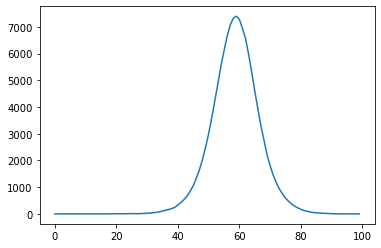

In [27]:
lockdown = False
daysContagious, lockdownDay, maskDay = initiateSim()
if os.path.exists("pandemicsave3.txt"):
    os.remove("pandemicsave3.txt")
saveFile = open("pandemicsave3.txt","a")
record = []
# run the simulation for 100 days
for x in range(0,100):
    if x == lockdownDay:
        lockdown = True
    if x == maskDay:
        for person in peopleDictionary:
            person.wearMask()
    
    print("DAY",x)
    runDay(daysContagious, lockdown)
    write = str(len([person for person in peopleDictionary if person.contagiousness>0])) + "\n"
    saveFile.write(write)
    print(len([person for person in peopleDictionary if person.contagiousness>0])," people are contagious on this day.")
    record.append(len([person for person in peopleDictionary if person.contagiousness>0]))

plt.plot(range(0,100),record)
    
saveFile.close()

# 

In [19]:
Simulation_df = pd.DataFrame(range(0,100))
Simulation_df

,0
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


,Simulation1,Simulation2,Simulation3,Simulation4
0,2,1,2,2
1,2,2,5,2
2,5,4,7,4
3,9,6,12,6
4,15,11,21,13
5,21,17,34,18
6,33,30,60,25
7,50,50,89,35
8,76,76,127,57
9,106,121,193,77


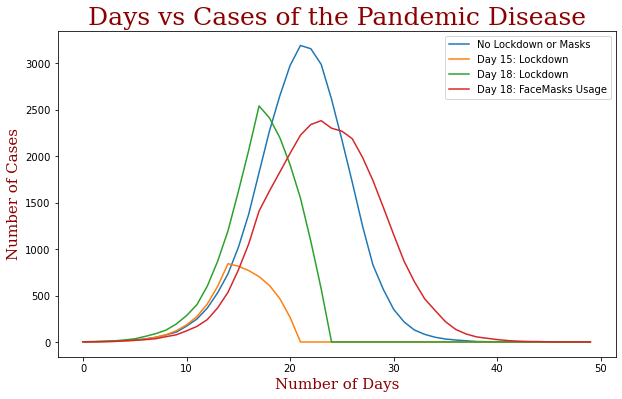

In [86]:
from scipy.stats import norm
import random
import time

Simulation_df = pd.DataFrame()


#simulation of a single person
class Person():
    def __init__(self, startingImmunity):
        if random.randint(0,100)<startingImmunity:
            self.immunity = True
        else:
            self.immunity = False
        self.contagiousness = 0
        self.mask = False
        self.contagiousDays = 0
        #use gaussian distribution for number of friends; average is 5 friends
        self.friends = int((norm.rvs(size=1,loc=0.5,scale=0.15)[0]*10).round(0))
    def wearMask(self):
        self.contagiousness /= 2
        
def initiateSim(simName,numPeople,startingImmunity,startingInfecters,daysContagious,lockdownDay,maskDay):
    for x in range(0,numPeople):
        peopleDictionary.append(Person(startingImmunity))
    for x in range(0,startingInfecters):
        peopleDictionary[random.randint(0,len(peopleDictionary)-1)].contagiousness = int((norm.rvs(size=1,loc=0.7,scale=0.15)[0]*10).round(0)*10)
    return daysContagious, lockdownDay, maskDay, simName
def runDay(daysContagious, lockdown):
    #this section simulates the spread, so it only operates on contagious people, thus:
    for person in [person for person in peopleDictionary if person.contagiousness>0 and person.friends>0]:
        peopleCouldMeetToday = int(person.friends/2)
        if peopleCouldMeetToday > 0:
            peopleMetToday = random.randint(0,peopleCouldMeetToday)
        else:
            peopleMetToday = 0
            
        if lockdown == True:
            peopleMetToday= 0
            
        for x in range(0,peopleMetToday):
            friendInQuestion = peopleDictionary[random.randint(0,len(peopleDictionary)-1)]
            if random.randint(0,100)<person.contagiousness and friendInQuestion.contagiousness == 0 and friendInQuestion.immunity==False:
                friendInQuestion.contagiousness = int((norm.rvs(size=1,loc=0.5,scale=0.15)[0]*10).round(0)*10)
                #print(peopleDictionary.index(person), " >>> ", peopleDictionary.index(friendInQuestion))
            
    # Moving the contagiousDays on 1 day, then giving the person immunity after daysContagious period.        
    for person in [person for person in peopleDictionary if person.contagiousness>0]:
        person.contagiousDays += 1
        if person.contagiousDays > daysContagious:
            person.immunity = True
            person.contagiousness = 0
            
def AppendDataframe(simName,numPeople,startingImmunity,startingInfecters,daysContagious,lockdownDay,maskDay):           
    lockdown = False
    daysContagious, lockdownDay, maskDay, simName = initiateSim(simName,numPeople,startingImmunity,startingInfecters,daysContagious,lockdownDay,maskDay)
    record = []
    for x in range(0,50):
        if x==lockdownDay:
            lockdown = True

        if x == maskDay:
            for person in peopleDictionary:
                person.wearMask()

        runDay(daysContagious,lockdown)
        record.append(len([person for person in peopleDictionary if person.contagiousness>0]))
    Simulation_df[simName] = pd.Series(record)
peopleDictionary = [] 
AppendDataframe("Simulation1",5000,1,1,7,100,100)
peopleDictionary = [] 
AppendDataframe("Simulation2",5000,1,1,7,15,100)
peopleDictionary = [] 
AppendDataframe("Simulation3",5000,1,1,7,18,100)
peopleDictionary = [] 
AppendDataframe("Simulation4",5000,1,1,7,100,18)
display(Simulation_df.head(100))

plt.figure(figsize=(10,6))

plt.plot(range(0,50),Simulation_df["Simulation1"], label="No Lockdown or Masks")
plt.plot(range(0,50),Simulation_df["Simulation2"], label="Day 15: Lockdown")
plt.plot(range(0,50),Simulation_df["Simulation3"], label="Day 18: Lockdown")
plt.plot(range(0,50),Simulation_df["Simulation4"], label="Day 18: FaceMasks Usage")

plt.title("Days vs Cases of the Pandemic Disease", fontdict=font_Title)
plt.xlabel("Number of Days", fontdict=font)
plt.ylabel("Number of Cases", fontdict=font)
plt.legend()